## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## Reading Dataset with Pandas

In [2]:
Dataset = pd.read_excel('Potential datasets for recruitment.xlsx','Dataset 2')
Dataset.head()
Dataset.drop_duplicates()


,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,"Class: (2 for benign, 4 for malignant)",4 for malignant)
0,1000025,5,1,1,1,2,1,3,1,1,2,NaN
1,1002945,5,4,4,5,7,10,3,2,1,2,NaN
2,1015425,3,1,1,1,2,2,3,1,1,2,NaN
3,1016277,6,8,8,1,3,4,3,7,1,2,NaN
4,1017023,4,1,1,3,2,1,3,1,1,2,NaN
5,1017122,8,10,10,8,7,10,9,7,1,4,NaN
6,1018099,1,1,1,1,2,10,3,1,1,2,NaN
7,1018561,2,1,2,1,2,1,3,1,1,2,NaN
8,1033078,2,1,1,1,2,1,1,1,5,2,NaN
9,1033078,4,2,1,1,2,1,2,1,1,2,NaN


In [3]:
Dataset.describe()



,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,"Class: (2 for benign, 4 for malignant)",4 for malignant)
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,0.0
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557,NaN
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273,NaN
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,NaN
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,NaN
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000,NaN
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000,NaN
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000,NaN


## Dropping Useless Features

In [4]:
cols_drop={
    'Sample code number',
    ' 4 for malignant)'
}
ds = Dataset.drop(cols_drop,axis=1)



## Data Describe

In [5]:
ds.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,"Class: (2 for benign, 4 for malignant)"
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [6]:
ds.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,"Class: (2 for benign, 4 for malignant)"
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


## Searching for Missing Values 

In [7]:
for col in ds.columns:
    print(np.unique(ds[col]))
print(ds.columns[5])
print(np.unique(ds[ds.columns[5]]))



[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8  9 10]
[1 2 3 4 5 6 7 8 9 10 u'?']
[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8 10]
[2 4]
Bare Nuclei
[1 2 3 4 5 6 7 8 9 10 u'?']


Thus Column 'Bare Nuclie' contains some missing vaues as '?' 

In [8]:
arr = ds['Bare Nuclei']!='?'
sum=0
for ix in range(arr.shape[0]):
    if arr[ix]:
        sum=sum+ds['Bare Nuclei'][ix]
# print(sum)

mean =(sum)/arr.shape[0]
# print(mean)

## putting values in places of '?'

for ix in range(arr.shape[0]):
    if arr[ix]==False:
        ds['Bare Nuclei'][ix] = mean
# print(np.unique(ds['Bare Nuclei']))



for col in ds.columns:
    print(np.unique(ds[col]))




/home/arif/.local/lib/python2.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8  9 10]
[1 2 3 4 5 6 7 8 9 10]
[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8 10]
[2 4]


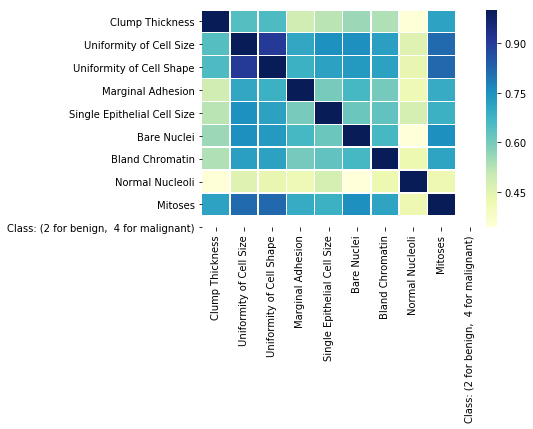

In [9]:
corr_mat = ds.corr()
# sns.heatmap?
sns.heatmap(corr_mat,xticklabels=ds.columns,yticklabels=ds.columns,cmap="YlGnBu",linewidths=.5)




Dropping Uniformity of cell Shape and leeping uniformity od cell size as these both are highly corelated features

In [10]:
ds = ds.drop('Uniformity of Cell Size',axis=1)

## Target Distribution % 

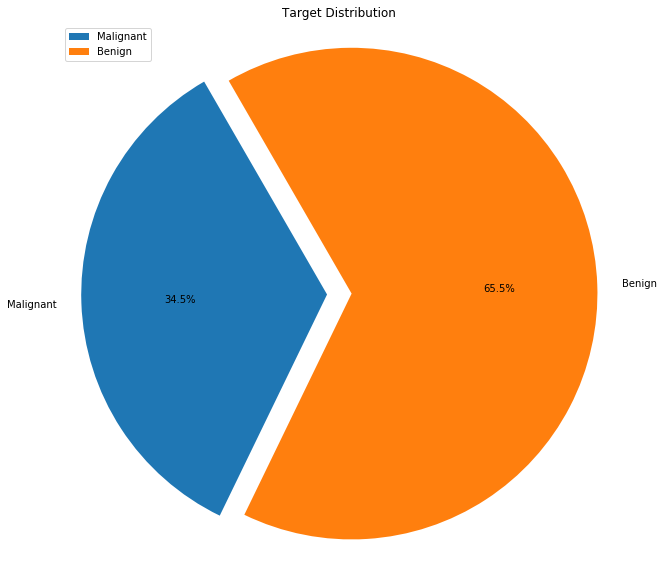

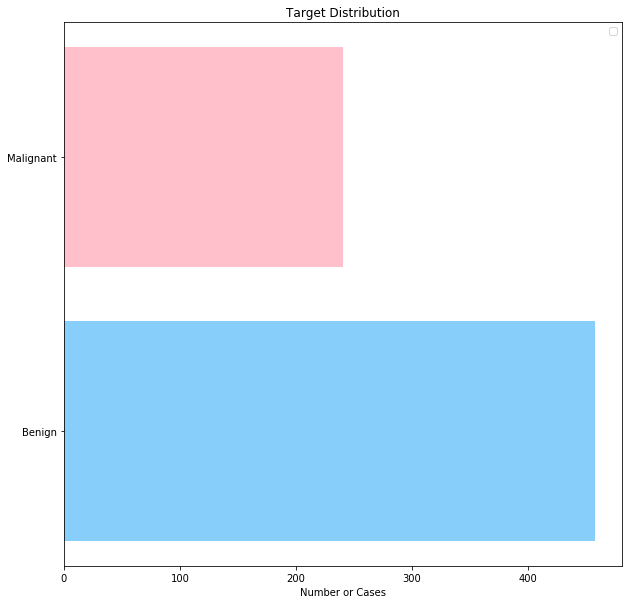

In [11]:
temp_data=ds.values

mal = np.sum([temp_data[:,-1]==4])
ben = np.sum([temp_data[:,-1]==2])


classes = 'Malignant','Benign'
sizes=[mal,ben]
explode={0.1,0,0}
fig1, ax1 = plt.subplots(1,1,figsize=(10,10))
ax1.pie(sizes, explode=explode, labels=classes, autopct='%1.1f%%', startangle=120)
ax1.axis('equal') 
ax1.legend()
ax1.set_title('Target Distribution')
# plt.show()


color=[ 'pink', 'lightskyblue']
  ##------>>Bar Graph
y_pos=np.arange(len(classes))
fig2,ax2 = plt.subplots(figsize=(10,10))
ax2.barh(y_pos,sizes,align='center',color=color)
ax2.set_title("Target Distribution")

ax2.set_xlabel('Number or Cases')
ax2.invert_yaxis()
ax2.set_yticks(y_pos)
ax2.set_yticklabels(classes)
ax2.legend()
plt.show()

In [12]:

# ds.head()
ds = ds.dropna()
x_=ds.values
# print(ds.columns)

In [13]:
x_=np.array(x_)
np.random.shuffle(x_)
ds.head()

,Clump Thickness,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,"Class: (2 for benign, 4 for malignant)"
0,5,1,1,2,1,3,1,1,2
1,5,4,5,7,10,3,2,1,2
2,3,1,1,2,2,3,1,1,2
3,6,8,1,3,4,3,7,1,2
4,4,1,3,2,1,3,1,1,2


In [14]:
#Slicing the target values and feature values

data_y = x_[:,-1]
data_x=x_[:,:-1]

In [15]:
## Changing the Target values to 0 and 1 to feed to the classifier
le = LabelEncoder()
data_y=le.fit_transform(data_y)

In [16]:
x_train,x_test,y_train,y_test = train_test_split(data_x,data_y,test_size=0.2)

In [17]:
print(x_train.shape)
print(y_train.shape)


(559, 8)
(559,)


## Q 1. Building a Classifier

## Classification Using Different Classifiers

## 1. Naive Bayes

In [18]:
classifier =  GaussianNB()

classifier.fit(x_train,y_train)

score_testing = classifier.score(x_test,y_test)
score_training = classifier.score(x_train,y_train)


print("Score on Testing Data : %",score_testing)
print("Score on Training Data : %",score_training)

('Score on Testing Data : %', 0.9857142857142858)
('Score on Training Data : %', 0.9534883720930233)


## 2.Decision Tree

In [19]:
dt = DecisionTreeClassifier()

dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
score_testing_dt = dt.score(x_test,y_test)
score_training_dt = dt.score(x_train,y_train)

print("Score on Testing Data : %",score_testing_dt)
print("Score on Testing Data : %",score_training_dt)

('Score on Testing Data : %', 0.9571428571428572)
('Score on Testing Data : %', 1.0)


## 3. Support Vector Machine 

## - OneVsRestClassifier

In [21]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC


In [22]:
lr1 = OneVsRestClassifier(SVC(kernel='linear'))
lr1.fit(x_train,y_train)

score_testing_lr1 = lr1.score(x_test,y_test)
score_training_lr1 = lr1.score(x_train,y_train)


print("Score on Testing Data : %",score_testing_lr1)
print("Score on Testing Data : %",score_training_lr1)

('Score on Testing Data : %', 0.9857142857142858)
('Score on Testing Data : %', 0.964221824686941)


##  - OneVsOneClassifier

In [23]:

lr2 = OneVsOneClassifier(SVC(kernel='linear'))
lr2.fit(x_train,y_train)

score_testing_lr2 = lr2.score(x_test,y_test)
score_training_lr2 = lr2.score(x_train,y_train)


print("Score on Testing Data : %",score_testing_lr2)
print("Score on Testing Data : %",score_training_lr2)

('Score on Testing Data : %', 0.9857142857142858)
('Score on Testing Data : %', 0.964221824686941)


 ## 4.Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier


/usr/local/lib/python2.7/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [25]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)

score_testing_rf = rf.score(x_test,y_test)
score_training_rf = rf.score(x_train,y_train)


print("Score on Testing Data : %",score_testing_rf)
print("Score on Testing Data : %",score_training_rf)

('Score on Testing Data : %', 0.9857142857142858)
('Score on Testing Data : %', 1.0)


## Question 2. (a) False Negatives on Best Classifier


In [26]:
from sklearn.metrics import confusion_matrix

In [38]:
# Getting number of false positive and false negatives

preds = classifier.predict(x_test)

## False Positives
cnt_fp=0
cnt_fn=0
for i in range(y_test.shape[0]):
    if y_test[i]==0:
        if preds[i]==1:
            cnt_fp+=1
    if y_test[i]==1:
        if preds[i]==0:
            cnt_fn+=1
    
print("Fasle Positives = %",cnt_fp)
print("Fasle Negatives = %",cnt_fn)


print(pd.DataFrame(confusion_matrix(y_test, preds),
columns=['pred_benign', 'pred_malgnant'], index=['benign', 'malignant']))

('Fasle Positives = %', 2)
('Fasle Negatives = %', 0)
           pred_benign  pred_malgnant
benign              91              2
malignant            0             47


## Question 2.(b)

Goal = Reduce patients who are being predicted as having benign tumor but actually have malignant tumor


This can be done by changing the decision threshold which is by default 0.5(i.e. if P >0.5 "Malignant" if p<0.5 "Benign")

In [28]:
clf =  RandomForestClassifier()

In [29]:
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [30]:
import itertools

In [31]:
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix"',
                          cmap = plt.cm.Blues) :
    plt.imshow(cm,  cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('False             True')
    plt.xlabel('Negative          Positive')

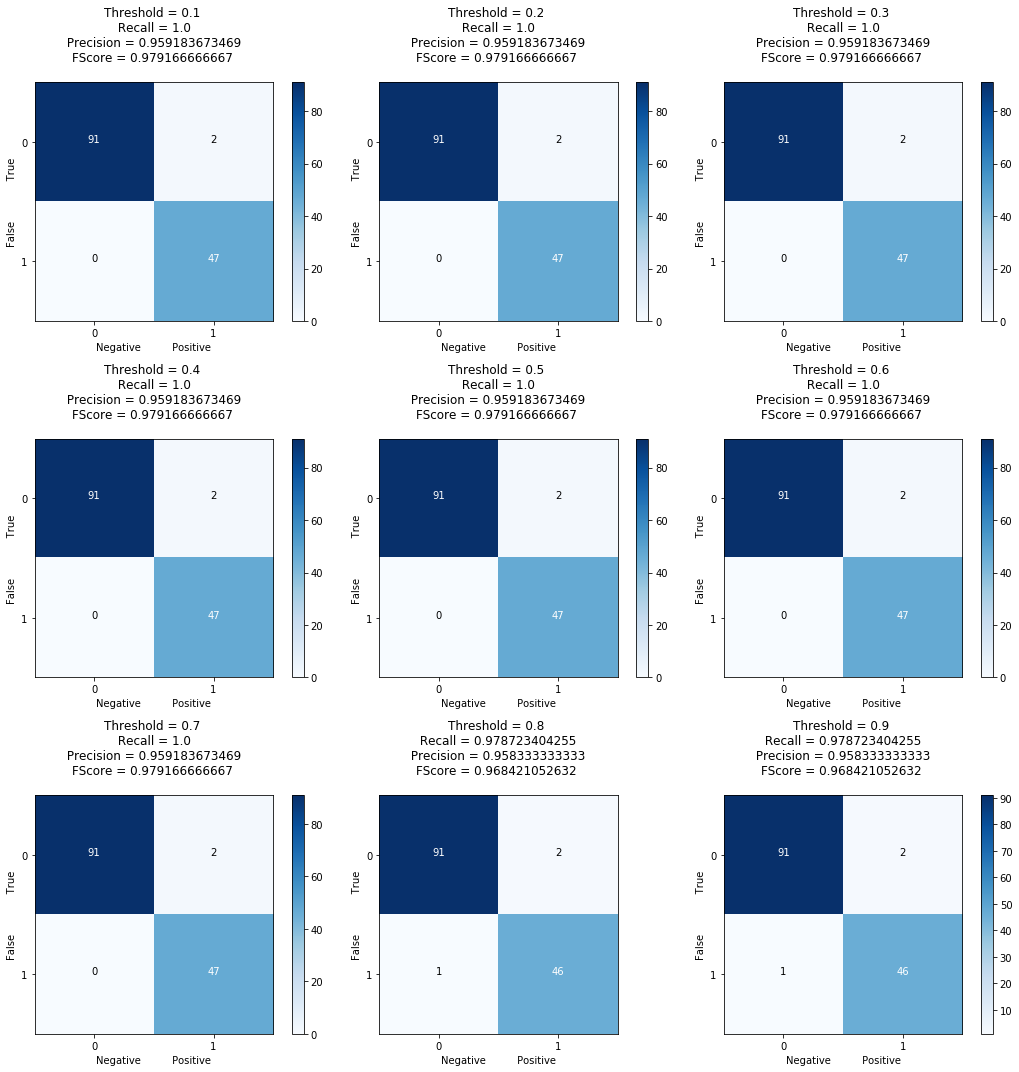

In [36]:
thresholds_adj = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize = (15,15))

j = 1
recall=[]
precision=[]
fscore=[]

for i in thresholds_adj:
    y_score = classifier.predict_proba(x_test)[:,1] > i
    
    
    plt.subplot(3,3,j)
    j += 1
    
    cm = confusion_matrix(y_test, y_score)
    
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    r=(float)(tp)/(tp+fn)
    p=(float)(tp)/(tp+fp)  
    
    f_sc = (float)(2*p*r)/(p+r)
    recall.append(r)
    precision.append(p)
    fscore.append(f_sc)
    
#     print('Recall w/ threshold = %s :'%i, ((float)(tp)/(tp+fn)))
    
    class_names = [0,1]
    plot_confusion_matrix(cm,classes=class_names,title='Threshold = %s \n Recall = %s \n Precision = %s \nFScore = %s \n' %(i,r,p,f_sc)) 


Text(0,0.5,'recall')

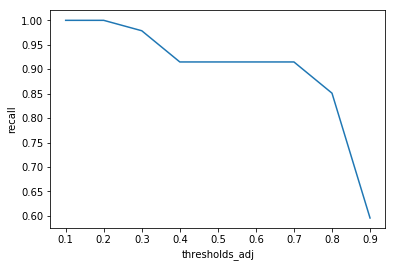

In [33]:
plt.plot(thresholds_adj,recall)
plt.xlabel('thresholds_adj')
plt.ylabel('recall')

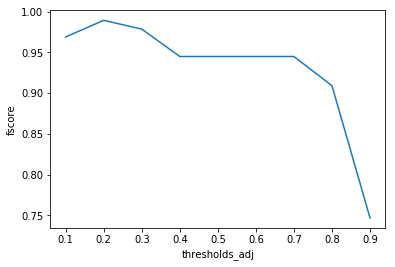

In [34]:
plt.plot(thresholds_adj,fscore)
plt.xlabel('thresholds_adj')
plt.ylabel('fscore')
plt.show()

## Taking Decision Threshold as 0.1 and RandomForestClassifier we can achive 100% recall

In [37]:

def accuracy(x_true,y_true):
    y_pred = classifier.predict_proba(x_true)[:,1] > 0.1
    return (float)(np.sum(y_pred==y_true))/y_true.shape[0]

print("Score on Testing Data = %",accuracy(x_test,y_test))
print("Score on Training Data = %",accuracy(x_train,y_train))

('Score on Testing Data = %', 0.9857142857142858)
('Score on Training Data = %', 0.9534883720930233)


## We have eliminated the chances of predicting a tumor as Benign when it is Malignant
## i.e no False Negative Cases